Parameter Space code: Laura's code 

[0.         0.01369863 0.01917808 0.02191781 0.04109589 0.0630137
 0.0739726  0.09041096 0.10136986 0.12876712 0.22191781 2.12054795
 2.86027397 2.88493151 2.90410959 2.95890411 3.03835616 3.04931507
 3.05753425 3.06849315 3.76986301 3.77534247 3.79178082]
SALT min cadence is2.8538812785388127e-05
MIKE min cadence is 0.0027397260273972603
[-0.13150685 -0.12876712 -0.0739726  -0.00547945  0.          0.84931507]


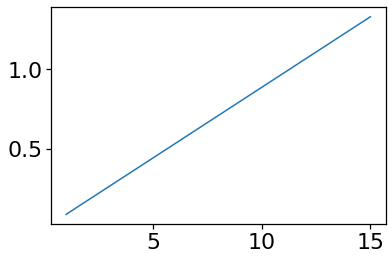

1.0


/home/omn24/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


In [1]:


# NOTE: to change between fixed inclination with Gaussian errors and any inclination, change lines 128/129 where inclination is defined.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from astropy import units as u
from scipy.optimize import curve_fit,fsolve

#maybe here we need to import our own radial velocity data which contains time series and rv measurements


""" 
df = pd.read_csv("/data/wdplanetary/omri/Output/resultfiles/SALT_Voigt/reruns/si5040.txt", delimiter='\t', encoding='utf-8')
df['TIMES'] = pd.to_datetime(df['TIMES'])
times = df["TIMES"]
t_years = np.array([float(t.total_seconds() / (24 * 3600*365)) for t in times])
differences = np.diff((times))
min_gap = np.min(differences)
print(min_gap) 

differences_seconds = np.diff(df['TIMES']).astype('timedelta64[s]')
# Convert time differences to years
differences_years = 15 * 60 / (3600 * 24 * 365.25)
# Find the minimum time gap between consecutive timestamps
min_gap = np.min(differences_years)
print("Minimum time gap between consecutive timestamps (in years):", min_gap)
 """
data = np.loadtxt("/data/wdplanetary/omri/Output/resultfiles/voigt_fitting_mg4481.txt",delimiter=',')
times = data[:, 0]
times = np.array(times)
times_years = times/365
print(times_years)
#print(times)
#differences = np.diff(times)
# Find the minimum cadence in the dataset in years
#min_gap = np.min(differences)/ 365
min_gap = 15/(60*24*365)
print(f"SALT min cadence is{min_gap}")

mdata = np.loadtxt("/data/wdplanetary/omri/Output/resultfiles/mike_voigt_fitting_ca_mg.txt",delimiter=',')
#print(mdata)
mtime = mdata[:, 0]
mtimes_years = mtime/365
mdifferences = np.diff(mtimes_years)
# Find the minimum cadence in the dataset in years
#mmin_gap = np.min(mdifferences)
mmin_gap = 1 / 365
print(f"MIKE min cadence is {mmin_gap}")
print(mtimes_years)

plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.linewidth'] = 1.25
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.25
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1.25

inc = 86.96170835
mass = 9.26 # Jupiter masses
period = 33.651287 # days
period_s = period * 24*3600 # seconds
period_yrs = period / 365 # yrs
M_WD = 0.6 # solar radii
M_Sun = 1.989e30 #kg

def semi_maj_AU(M_WD,period_yrs) :
    a = np.cbrt(M_WD * period_yrs**2) # Mass in solar mass and period in years gives a in AU
    return a

def Return_Mass(M_WD,period_yrs,Vel) :
    a = semi_maj_AU(M_WD,period_yrs)
    M_p =  (2.1e-4 * M_WD * M_Sun * Vel * period_yrs) / (2*np.pi*a)
    return M_p

def Return_Vobs(Mass_P,M_WD,period_yrs,inc) :
    a = semi_maj_AU(M_WD,period_yrs)
    Vel_infer = (Mass_P * 1.898e27 * 2*np.pi*a) / (2.1e-4 * M_WD * M_Sun * period_yrs)
    return ( Vel_infer * np.sin(inc*np.pi/180) ) / 1000

def Sine_fit(t,Amp,P) :
    return Amp * np.sin(2*np.pi/P * t)
""" 
#old formula
def Sine_Obs(N,P,Amp) :
    Obs = np.zeros(N)
    Obs_Err = np.zeros(N)
    Time = np.zeros(N)
    for i in range(N) :
        t = np.random.uniform(0,P)
        o = Sine_fit(t,Amp,P)
        #error is median error from observations
        o_rand = np.random.normal(loc=o,scale=0.6) #scale is the average error in the RV - 0.2 for MIKE, 0.6 for SALT
        Obs[i]  = o_rand
        Time[i] = t
    popt,pcov = curve_fit(Sine_fit,Time,Obs,p0=(Amp,P),maxfev=5000)
    t_fit = np.linspace(0,P,100)
    vr_fit = np.array([Sine_fit(x,*popt) for x in t_fit])
    plt.clf()
    plt.plot(t_fit,vr_fit)
    plt.scatter(Time,Obs)
    #plt.show()
    return popt[0]

 """
def Sine_Obs(t,N,P,Amp) :
    Obs = np.zeros(N)
    Obs_Err = np.zeros(N)
    Time = np.zeros(N)
    for i in range(N) :
        #t = np.random.uniform(0,P)
        o = Sine_fit(t[i],Amp,P)
        #error is median error from observations
        o_rand = np.random.normal(loc=o,scale=0.4) #scale of 0.4 for SALT, 0.3 for MIKE
        Obs[i]  = o_rand
        Time[i] = t[i]
    popt,pcov = curve_fit(Sine_fit,Time,Obs,p0=(Amp,P),maxfev=100000)
    t_fit = np.linspace(0,P,100)
    vr_fit = np.array([Sine_fit(x,*popt) for x in t_fit])
    
    return popt[0]

#M_p = Return_Mass(M_WD,period_yrs,Vel)/1.898e27

Mass_WD = 0.6
Mass_WD_Err = 0.1

Planet_Masses = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Periods = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#WD_Mass_Rand = np.random.normal(loc=Mass_WD,scale=Mass_WD_Err)
#print(WD_Mass_Rand)
Vobs_Masses = np.zeros(len(Planet_Masses))
for m in range(len(Planet_Masses)) :
    #for p in range(len(Periods)) :
    Vobs_Masses[m] = Return_Vobs(Planet_Masses[m],M_WD,period_yrs,inc)
plt.plot(Planet_Masses,Vobs_Masses)
plt.show()
# Number of points in x/y direction of grid
Resolution_mass = 20
Resolution_p = 20
# Define the different Deltas and timescales to be used in the model to fill in the grid
Mass_Arr = np.linspace(1,20,Resolution_mass)
#P_Arr = np.linspace(0.001,1.0,Resolution_p)
P_Arr = np.logspace(np.log10(0.001),np.log10(1.0),Resolution_p)

#Threshold for detection, on what bounds?
#Threshold = 1.32
#Threshold = 1.41
Threshold=0.84 #3standard deviations for MIKE data
#Threshold=2.5 #3standard deviations for MIKE data

#add a function for cadence of data - if period is less than a sin

Number = 10000
colourmap_arr = np.zeros((len(Mass_Arr),len(P_Arr)))
# Loop through the different Masss and Ps
for i in range(len(Mass_Arr)) :
    Mass = Mass_Arr[i]
    print(Mass)
    for j in range(len(P_Arr)) :
        P = P_Arr[j]
        Probability_All_WDs = [] # find the probability for the specific Mass and P for all white dwarf
        for N in range(Number) :
            inc = np.random.uniform(0.0,90.0) #add a random inclination between 0 and 90
            #inc = np.random.normal(loc=87,scale=4.1)
            Vobs_Mass_P = Return_Vobs(Mass,M_WD,P,inc)
            #Vobs_Mass_P_infer = Sine_Obs(5,P,Vobs_Mass_P)
            Vobs_Mass_P_infer = Sine_Obs(mtimes_years,len(mtimes_years),P,Vobs_Mass_P)
            if Vobs_Mass_P_infer < Threshold:
                # If the variability depth is smaller than the minimum detectable variability for that white dwarf then it won’t be possible for it to be detected and the final probability is 0
                Probability_All_WDs.append(0.0)
            elif  P <= 2* mmin_gap  :
                #Nyquist-Shannon sampling theorem - sampling rate is double the minimum detectable period
                Probability_All_WDs.append(0.0)
            else :
                Probability_All_WDs.append(1.0)
                """
                Probability_One_WD = np.zeros(Number)
                #I'm guessing this time array is a function of all the different periods or times we will use in our simulation
                Time_Arr = Get_Time_Array(WD_Name)
                for num in range(Number):
    			    # Do the test *Number* of times, then normalise
    				# Use a random uniform distribution to find the first time, the others are added on
                    Initial_Time = np.random.uniform(0.0,P*2)
                    #Initial_Time = 0
    				#print Initial_Time
    				# Find whether the values are 1 or 0 for all the times in the P array for the WD
                    Function_Arr = np.zeros(len(Time_Arr))
                    for t in range(len(Time_Arr)) :	
                        #Function is the detection calculation i'm guessing
                        Function_Arr[t] = Get_Value_Of_Function(P,float(Initial_Time + Time_Arr[t]))
    		
    				    #print Function_Arr
    					
    				    # For every time pair, it checks whether it found the variability or not
                    if all(x==Function_Arr[0] for x in Function_Arr) == True :
                        Probability_One_WD[num] = 0.0
                    else :
                        Probability_One_WD[num] = 1.0 """
    				
    				# If the minimum variability depth is reached, it finds the probability of detection for that WD
    				#Probability_All_WDs.append(np.mean(Probability_One_WD))
        colourmap_arr[i][j] = np.mean(Probability_All_WDs)


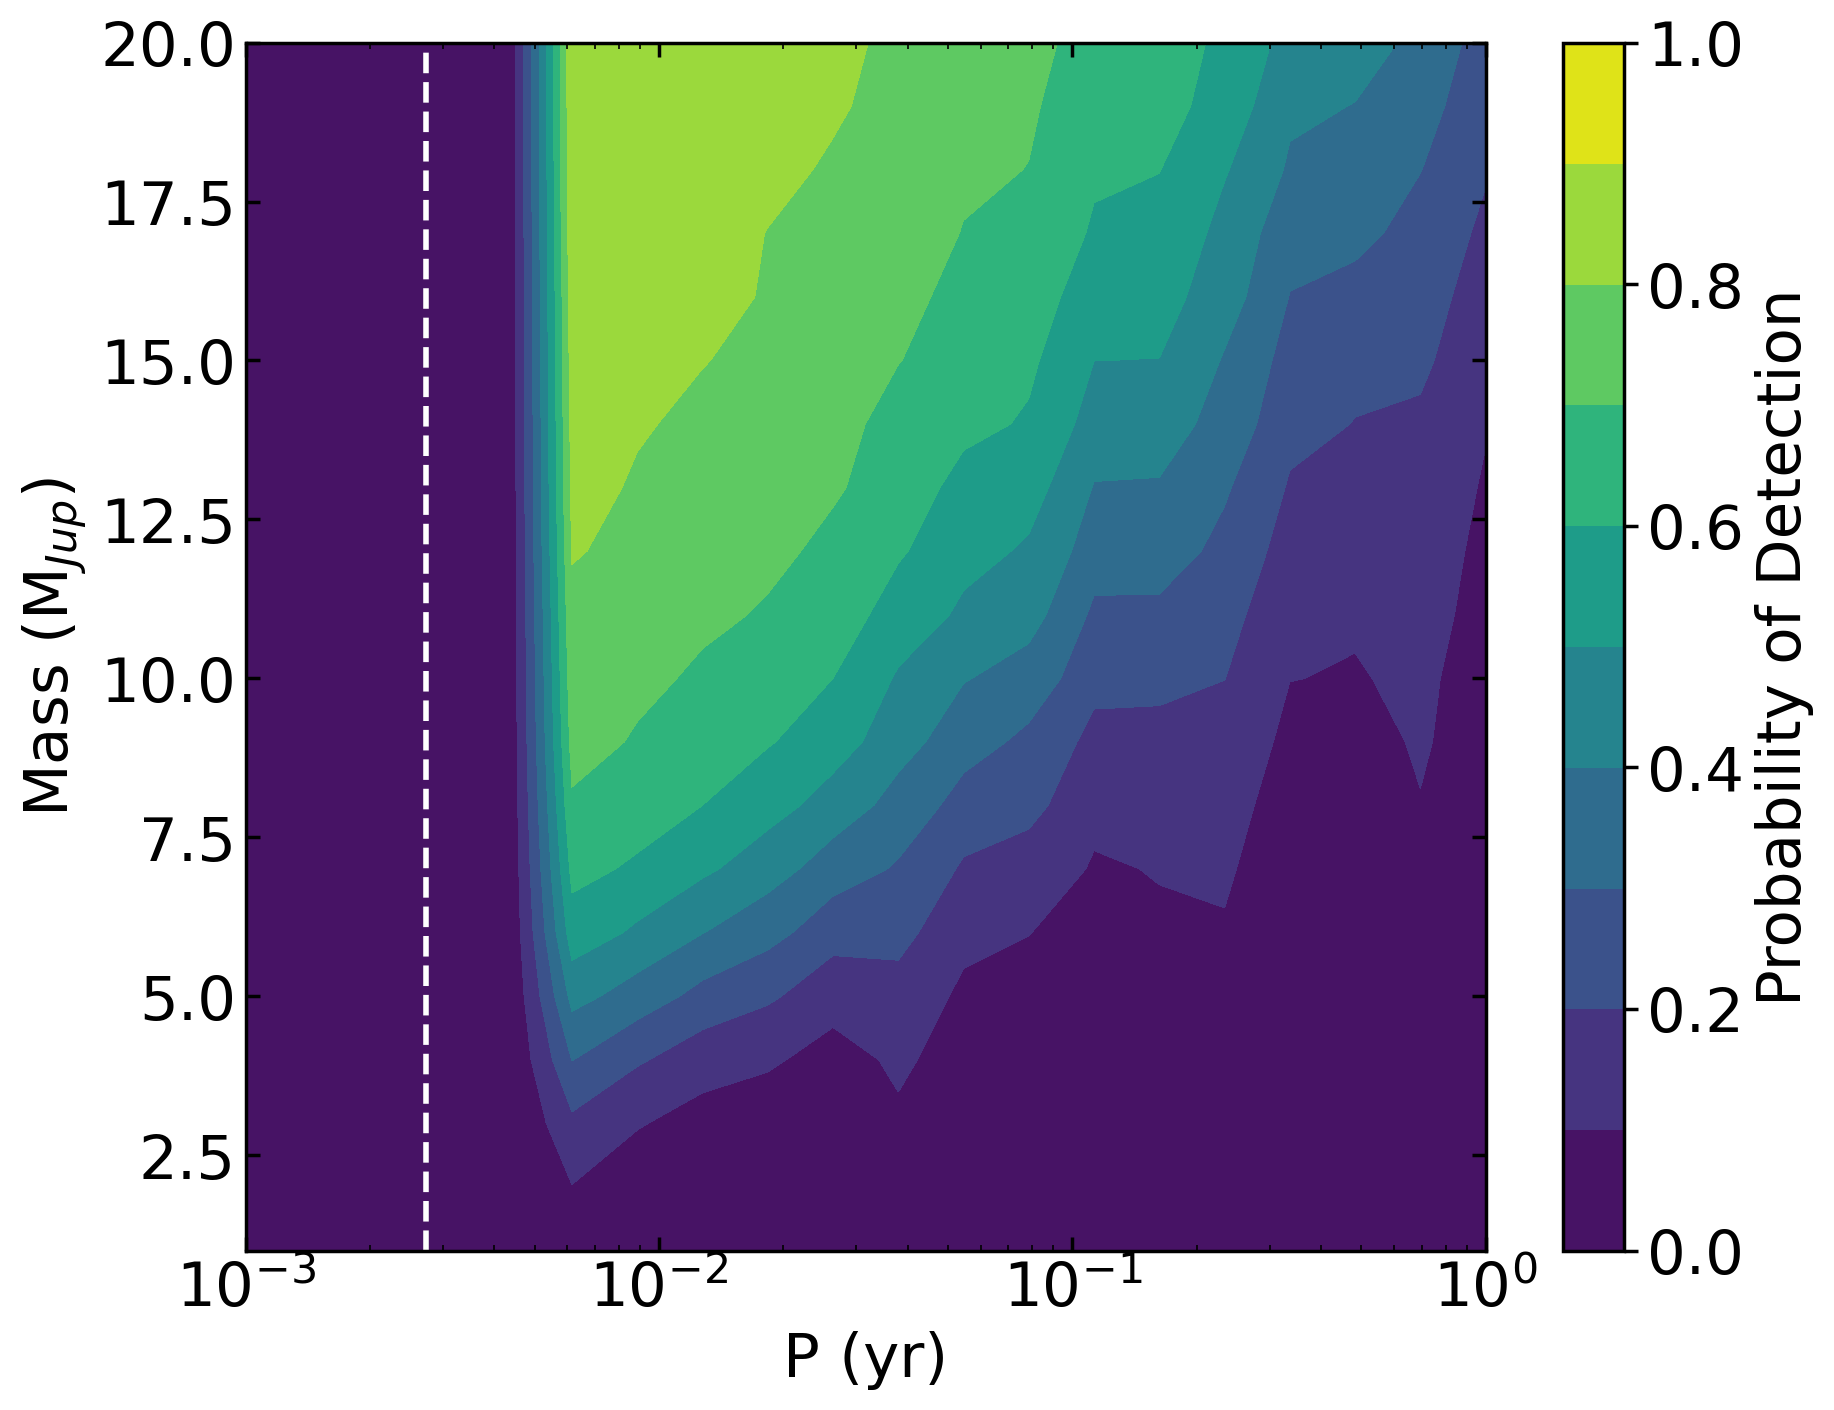

In [2]:
figure(figsize=(10, 8), dpi=200)
x = P_Arr
y = Mass_Arr
X, Y = np.meshgrid(x, y)
Z = colourmap_arr
plt.clf()
#labels = [‘0’,‘1’,‘2’,‘3’,‘4’,‘5’,‘6’]
#positions = (0, len(Timescale_Arr)/(len(labels) -1), 2*len(Timescale_Arr)/(len(labels) -1),3*len(Timescale_Arr)/(len(labels) -1),4*len(Timescale_Arr)/(len(labels) -1),5*len(Timescale_Arr)/(len(labels) -1),6*len(Timescale_Arr)/(len(labels) -1))
#plt.xticks(positions, labels)
#plt.pcolor(colourmap_arr,cmap=‘viridis’,vmin=0.0,vmax=1.0)
#plt.colorbar(ticks = [0,0.25,0.5,0.75,1.0], label = ‘Probability of Detection’)
plt.xlabel('P (yr)')
plt.ylabel(r'Mass (M$_{Jup}$)')
plt.contourf(X, Y, Z, [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) # ,cmap=‘viridis’
#plt.contourf(X, Y, Z) # ,cmap=‘viridis’
plt.colorbar(label = 'Probability of Detection')
plt.tick_params(which = 'both', top = True, right = True, direction = 'in')
plt.xscale('log')

#plt.fill_between([0.001, mmin_gap/365.25], 1, 20, hatch='xx', color="none", edgecolor='white')
#plt.text(0.001, 5, 'Period shorter than the minimum \n cadence of SALT observations', color='black', bbox=dict(boxstyle='square', fc="w", ec="w", alpha=1))

plt.axvline(1/365.25, linestyle = "dashed", color = "white", linewidth = 2)
#plt.yscale(‘log’)
plt.savefig("/data/wdplanetary/omri/Output/resultfiles/param_space/Detection_probability_MIKE_Voigt.pdf",bbox_inches="tight",dpi=400)
plt.show()